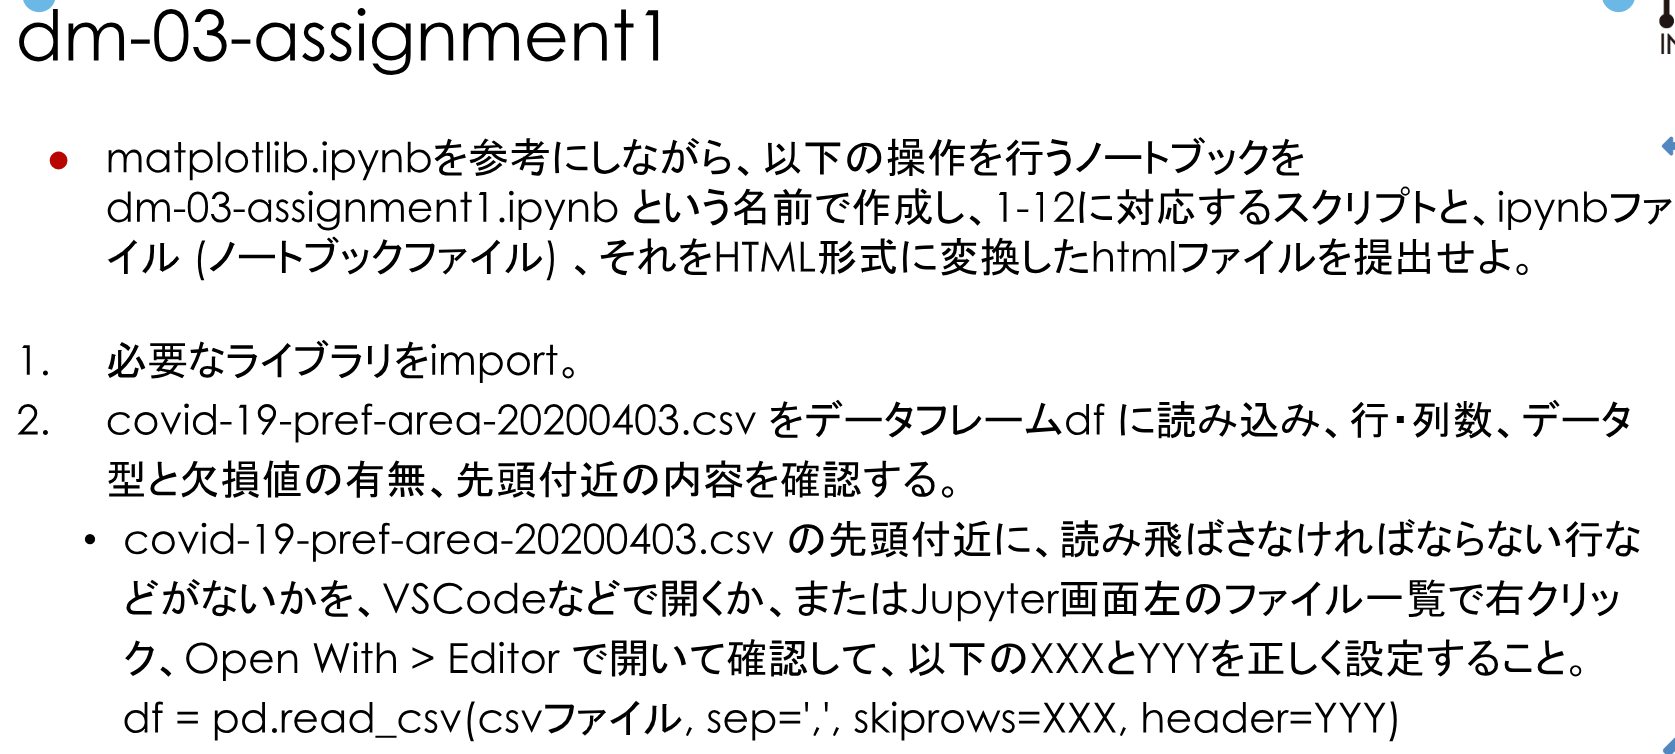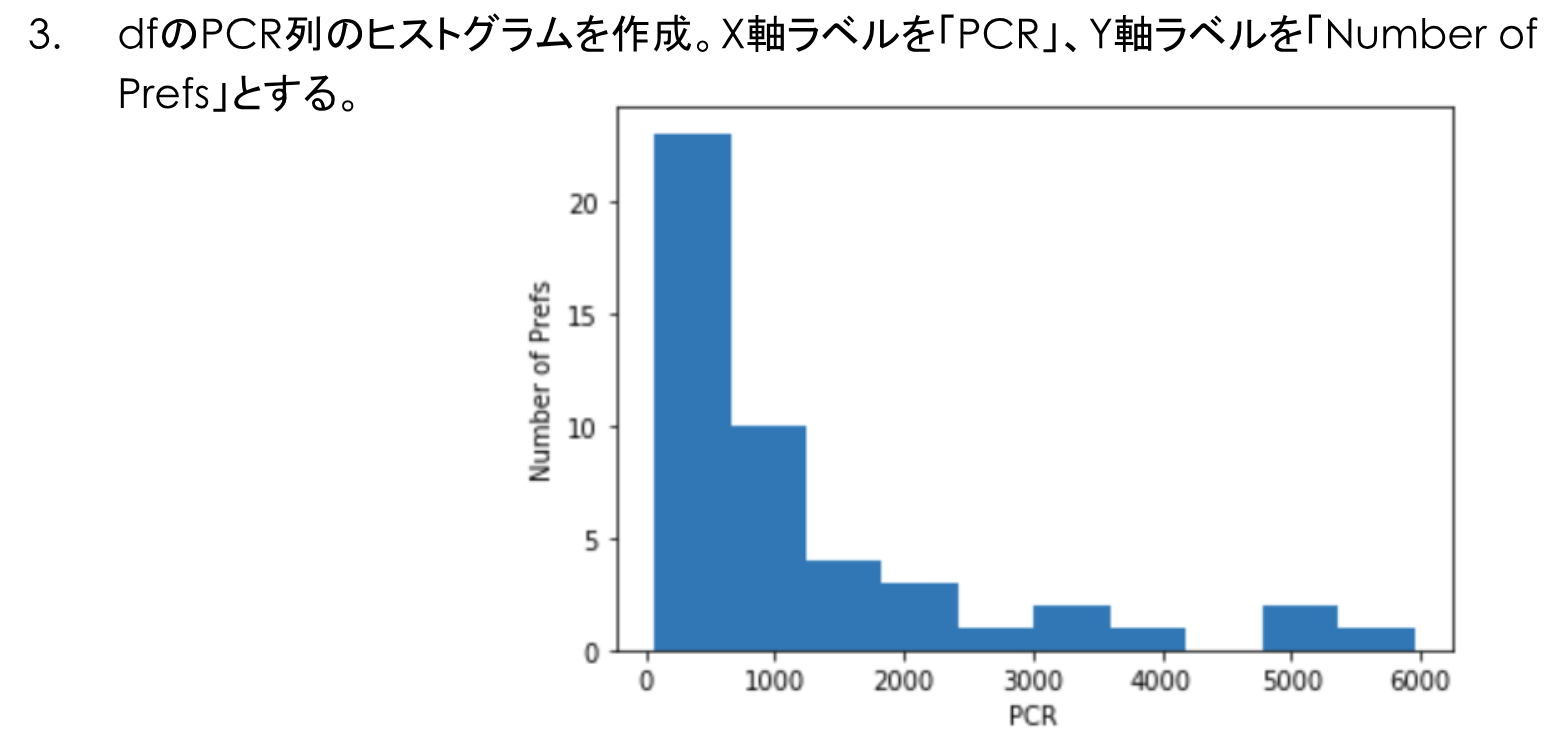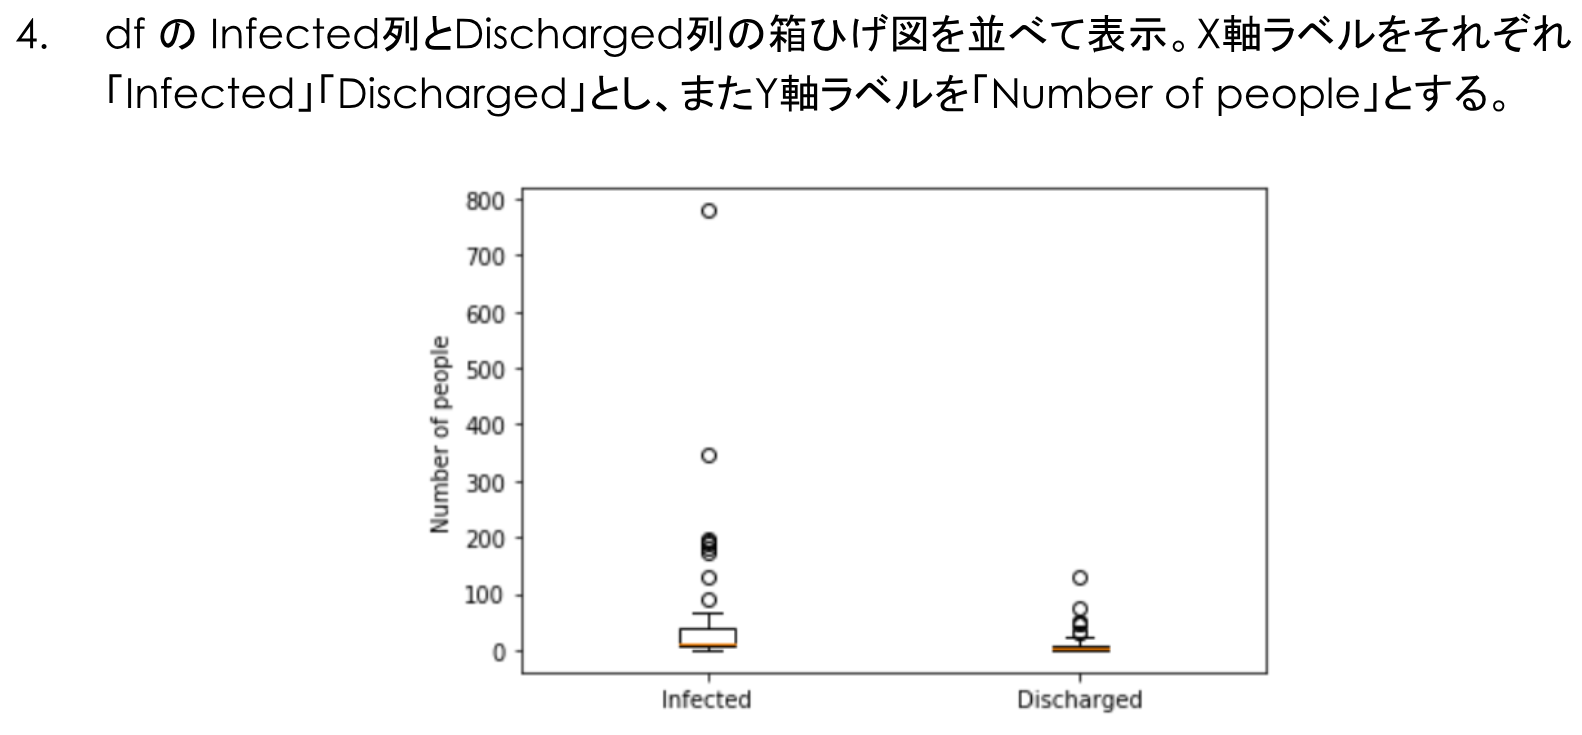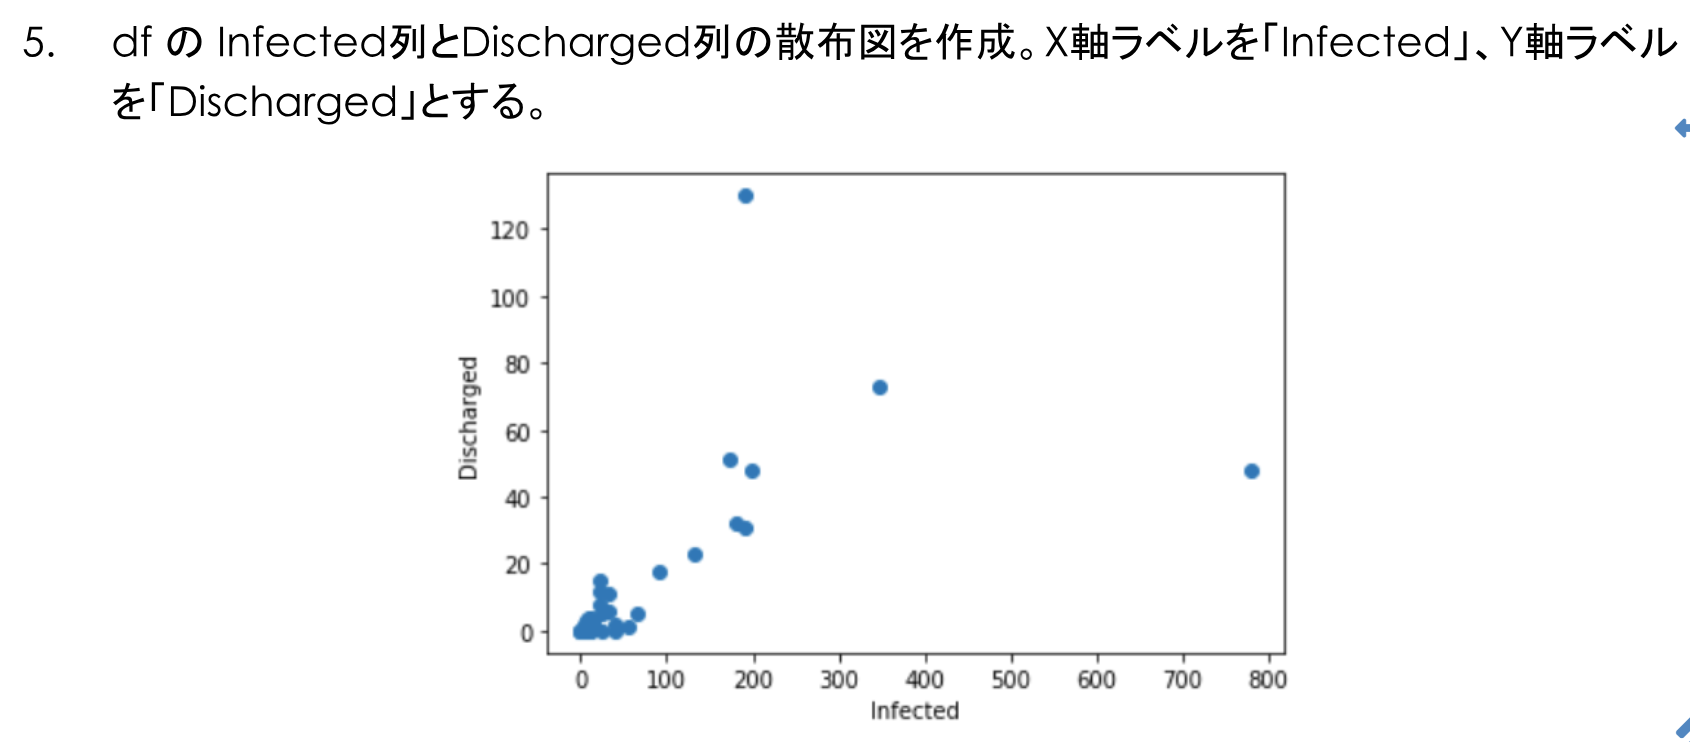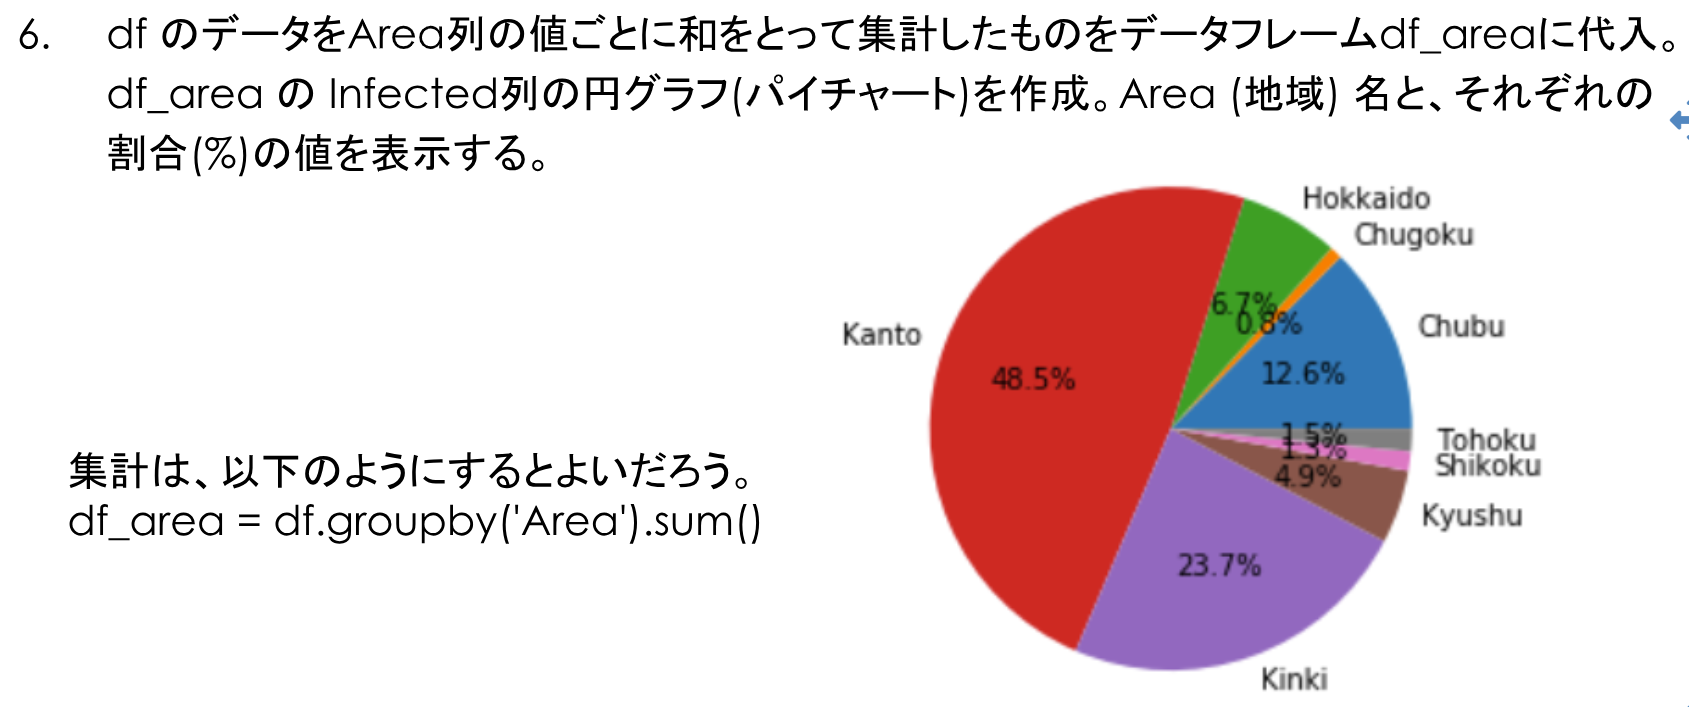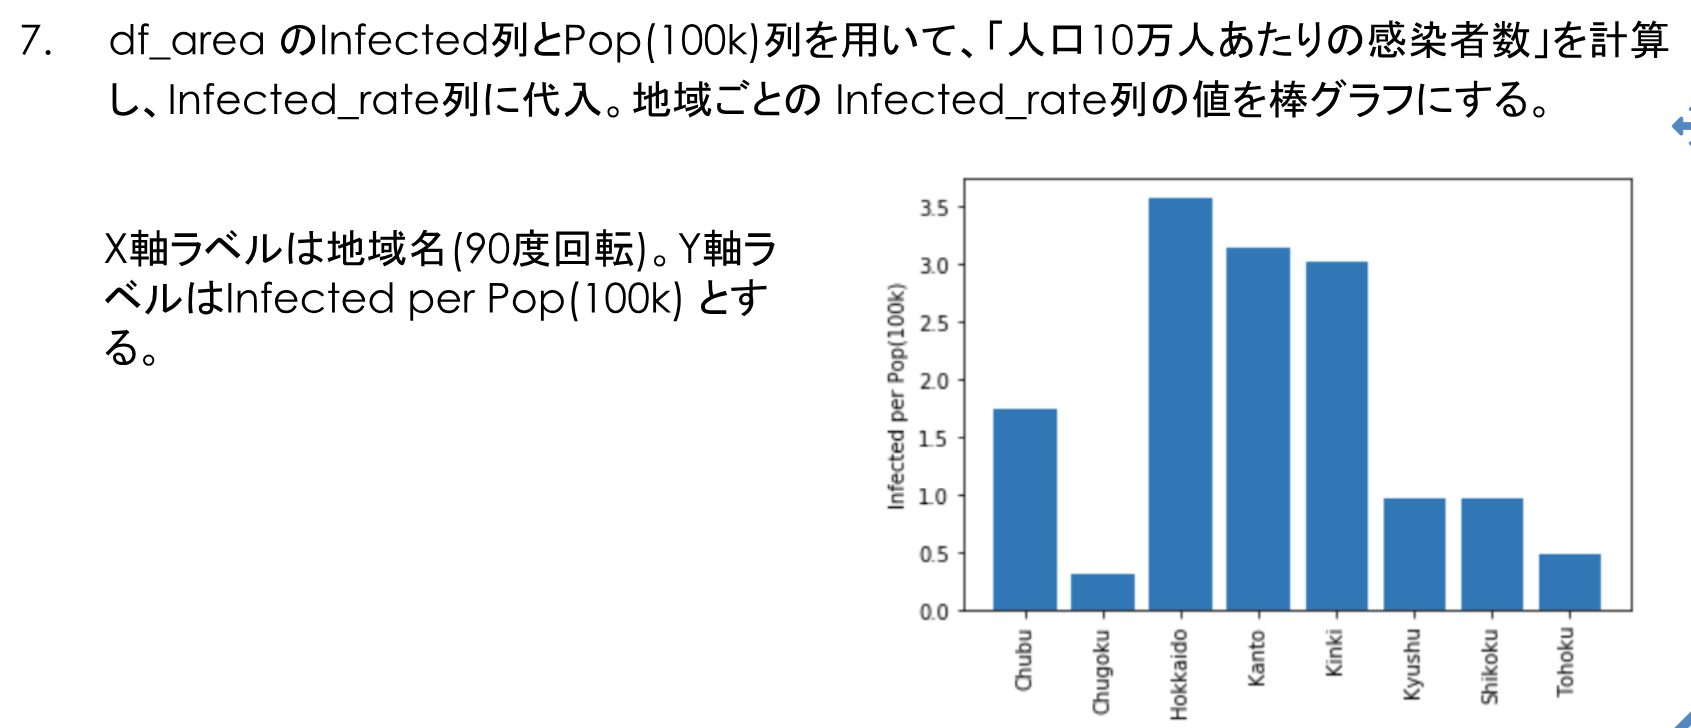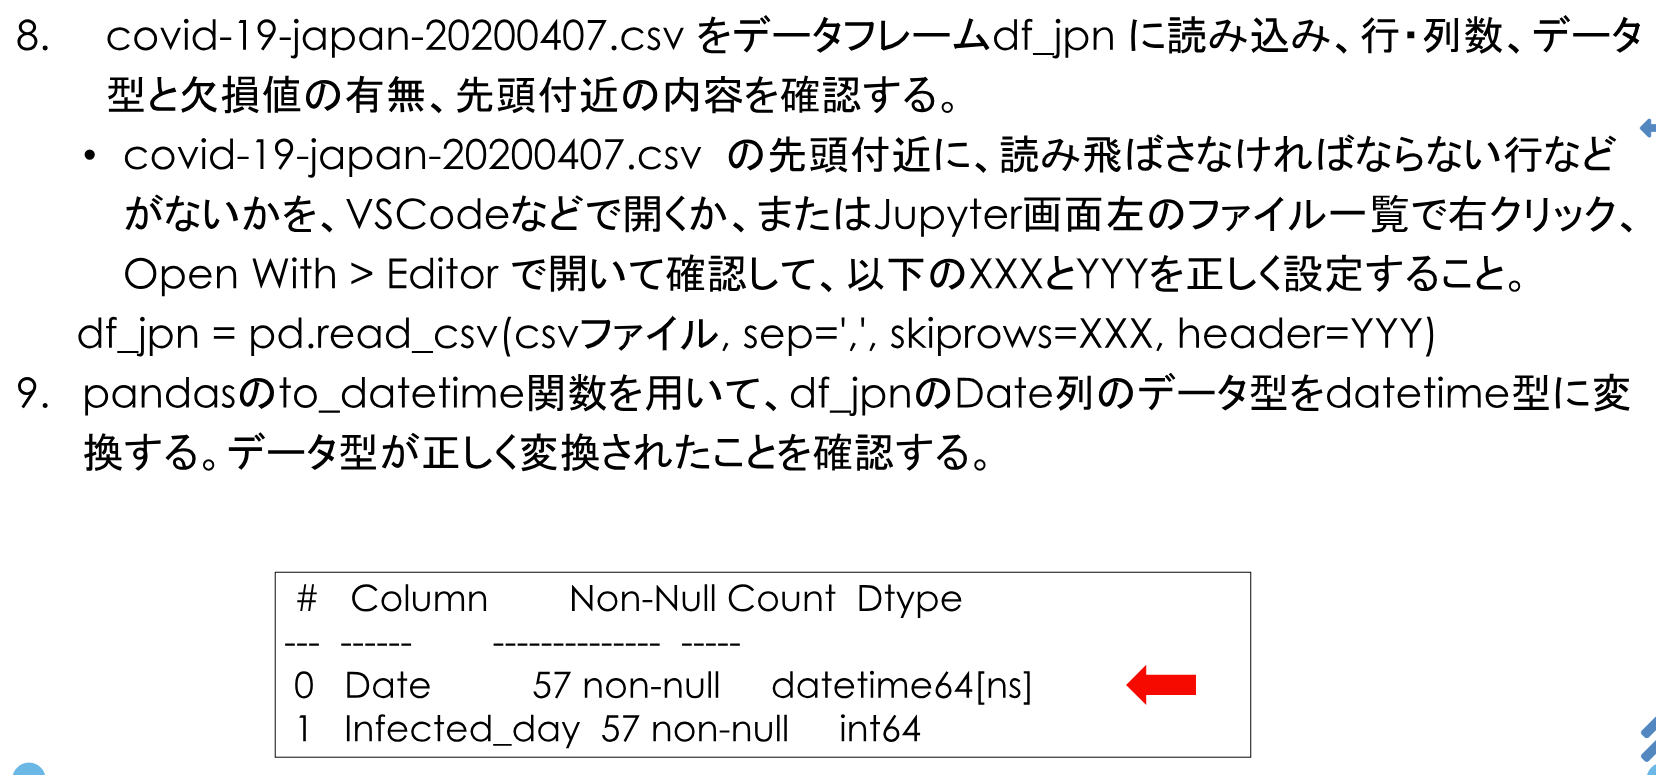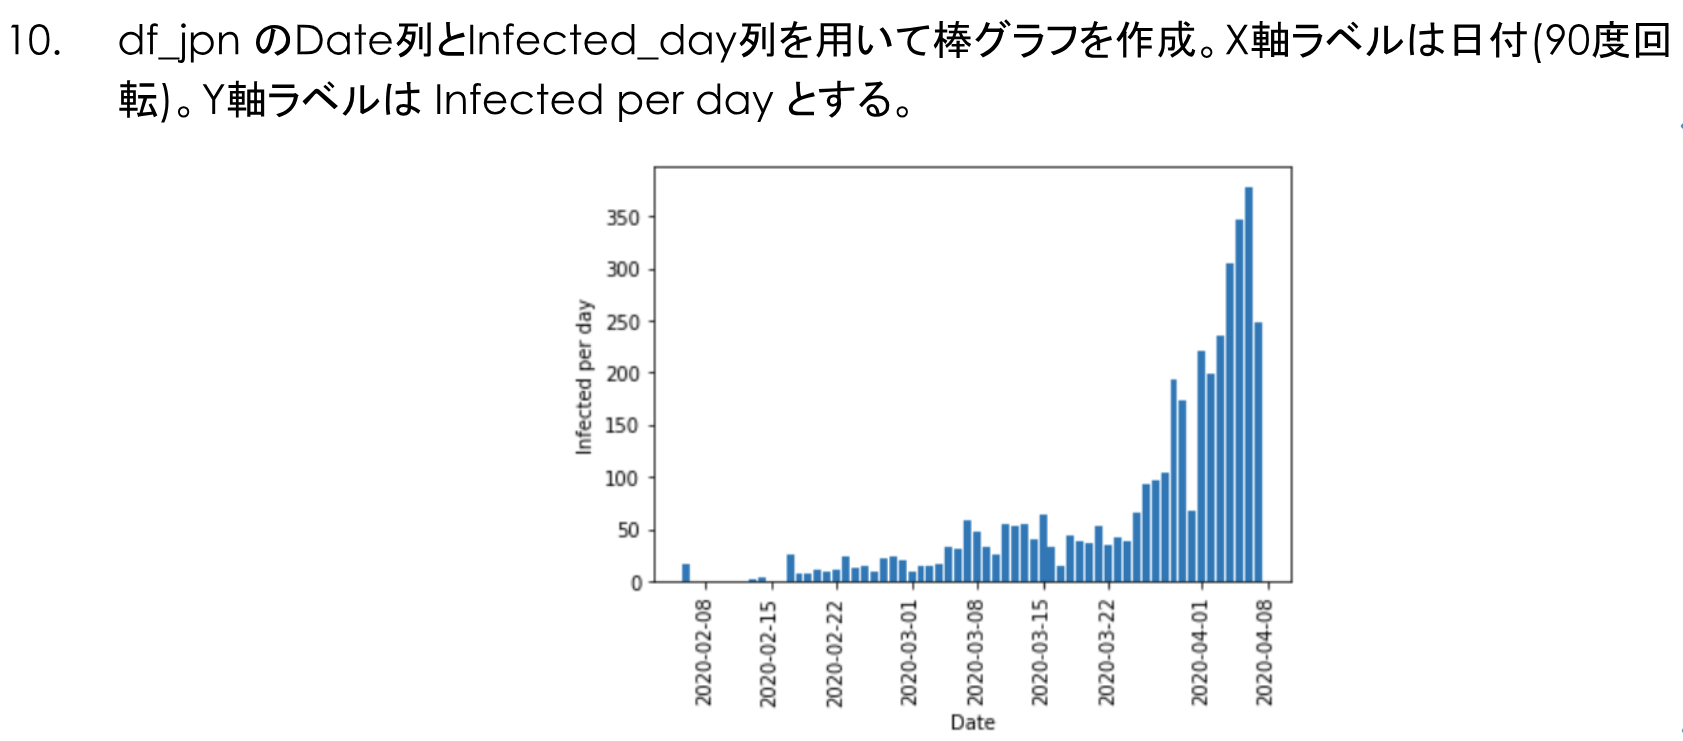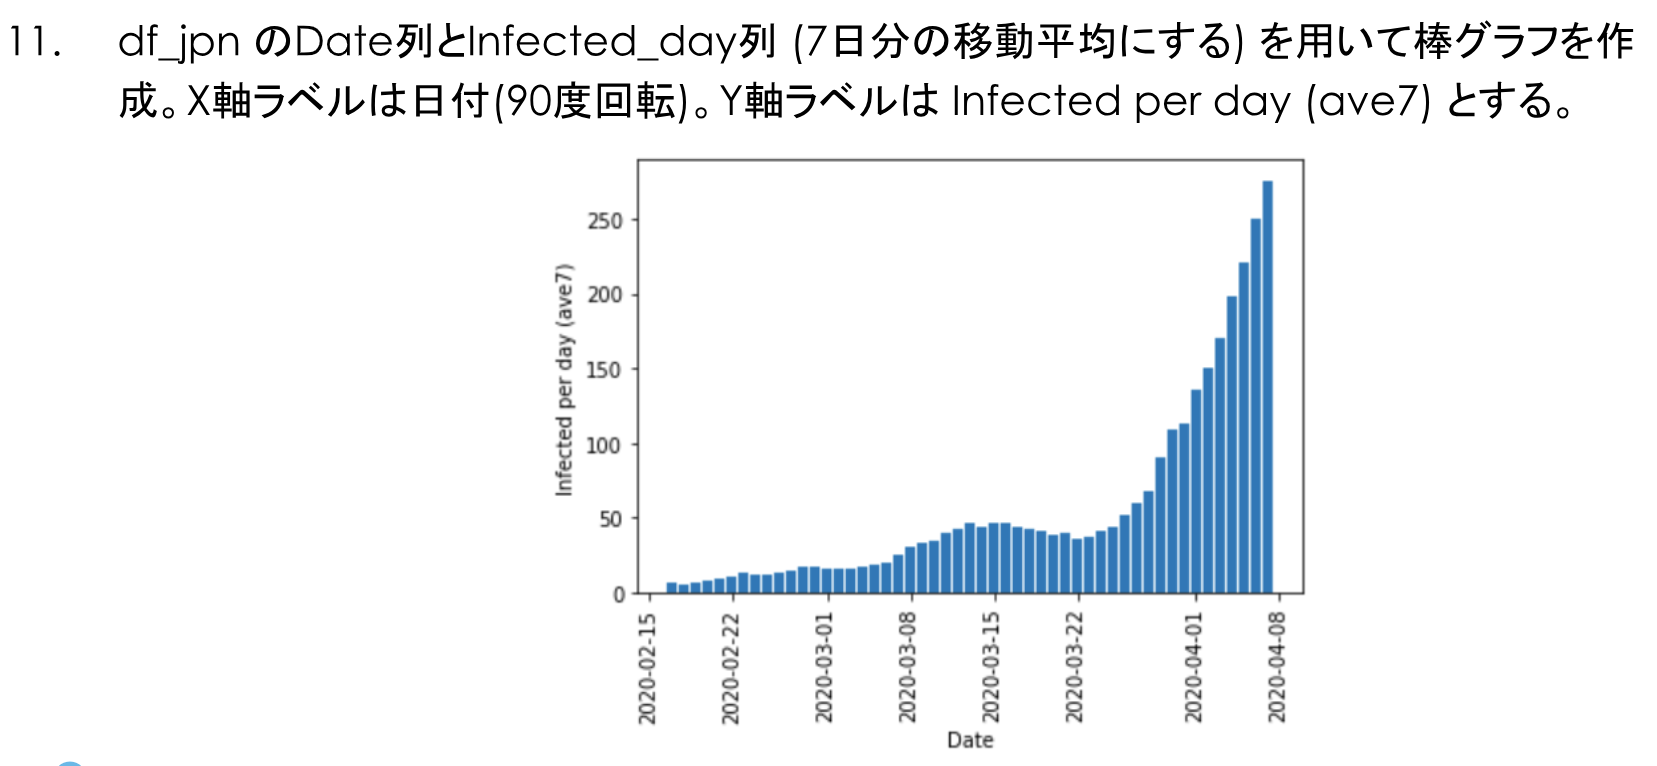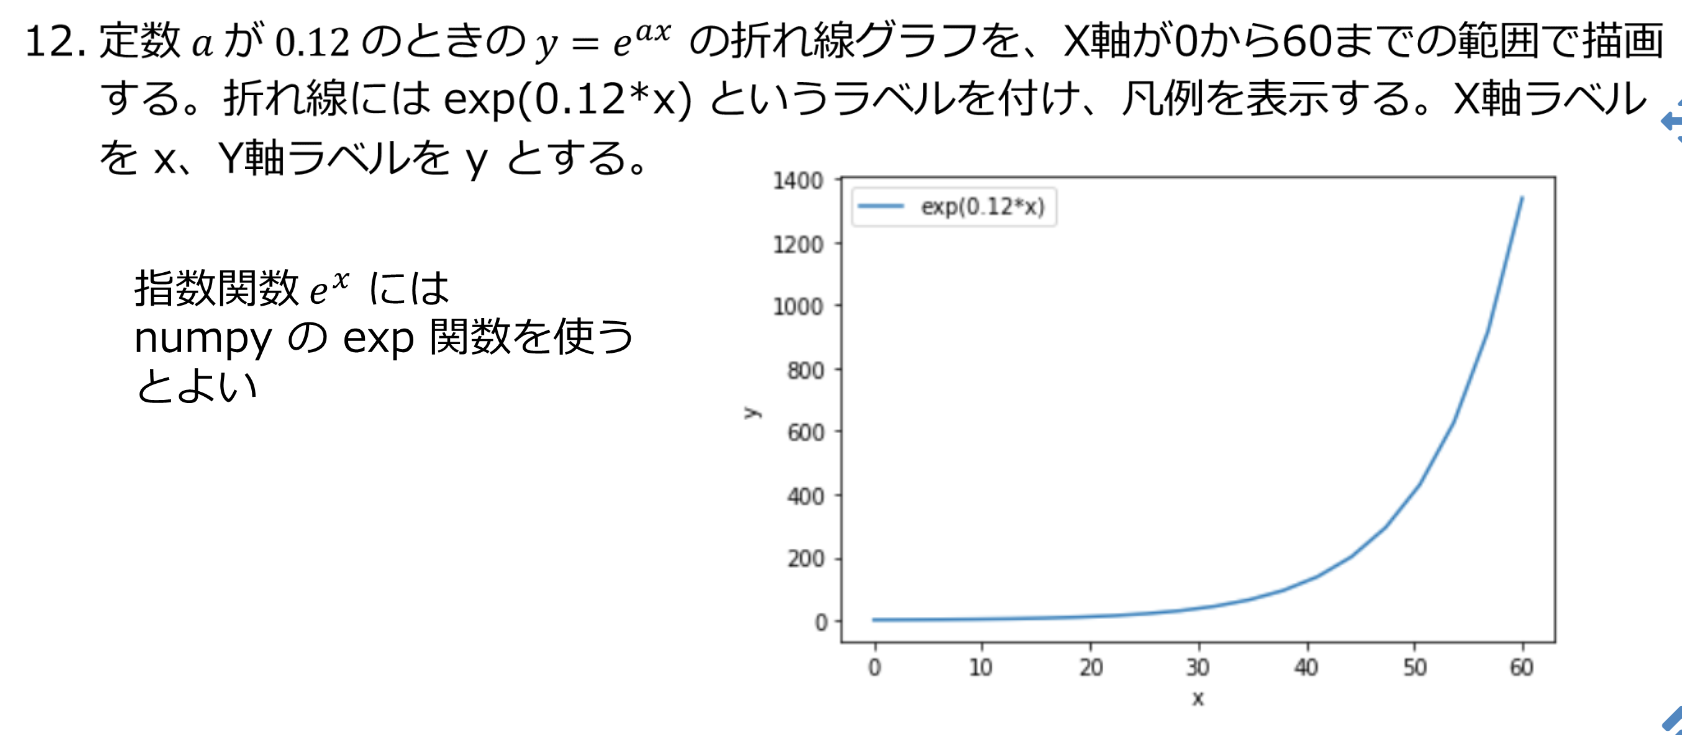

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

%config InlineBackend.figure_formats = {'png', 'retina'}  # for high-reso graph
plt.rcParams['font.family'] = 'IPAexGothic'

In [25]:
csv_in = 'data/covid-19-pref-area-20200403.csv'
df = pd.read_csv(csv_in, sep=',', comment='#', header=0)
print(df.shape)
print(df.info())
display(df.head())

(47, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pref        47 non-null     object 
 1   Pop(100k)   47 non-null     float64
 2   Infected    47 non-null     int64  
 3   Discharged  47 non-null     int64  
 4   PCR         47 non-null     int64  
 5   Area        47 non-null     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 2.3+ KB
None


Pref  Pop(100k)  Infected  Discharged   PCR      Area
0  Hokkaido       53.2       190         130  2803  Hokkaido
1    Aomori       12.8        11           0   249    Tohoku
2     Iwate       12.6         0           0    69    Tohoku
3    Miyagi       23.2        13           1   479    Tohoku
4     Akita       10.0         9           2   358    Tohoku

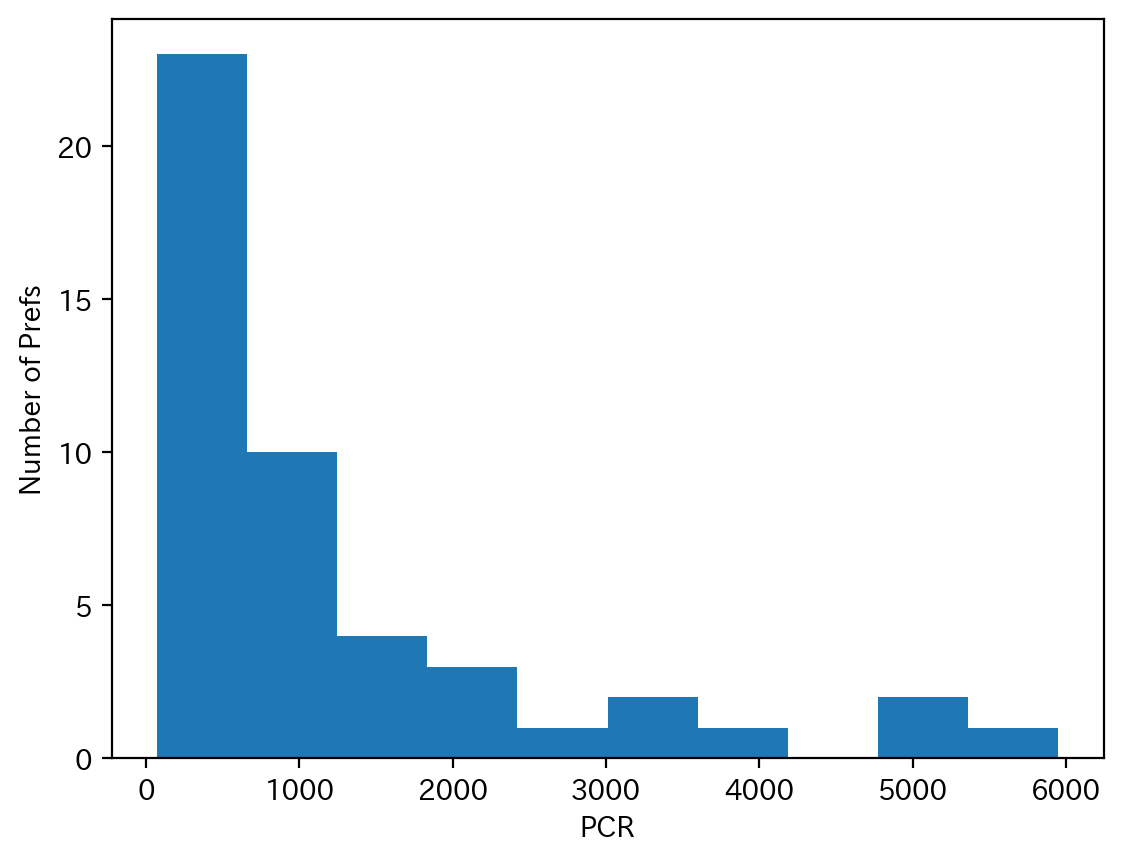

In [26]:
ser_aclose = df['PCR']
plt.hist(ser_aclose, bins=10)
plt.xlabel('PCR')
plt.ylabel('Number of Prefs')
plt.show()

Infected  Discharged
0       190         130
1        11           0
2         0           0
3        13           1
4         9           2

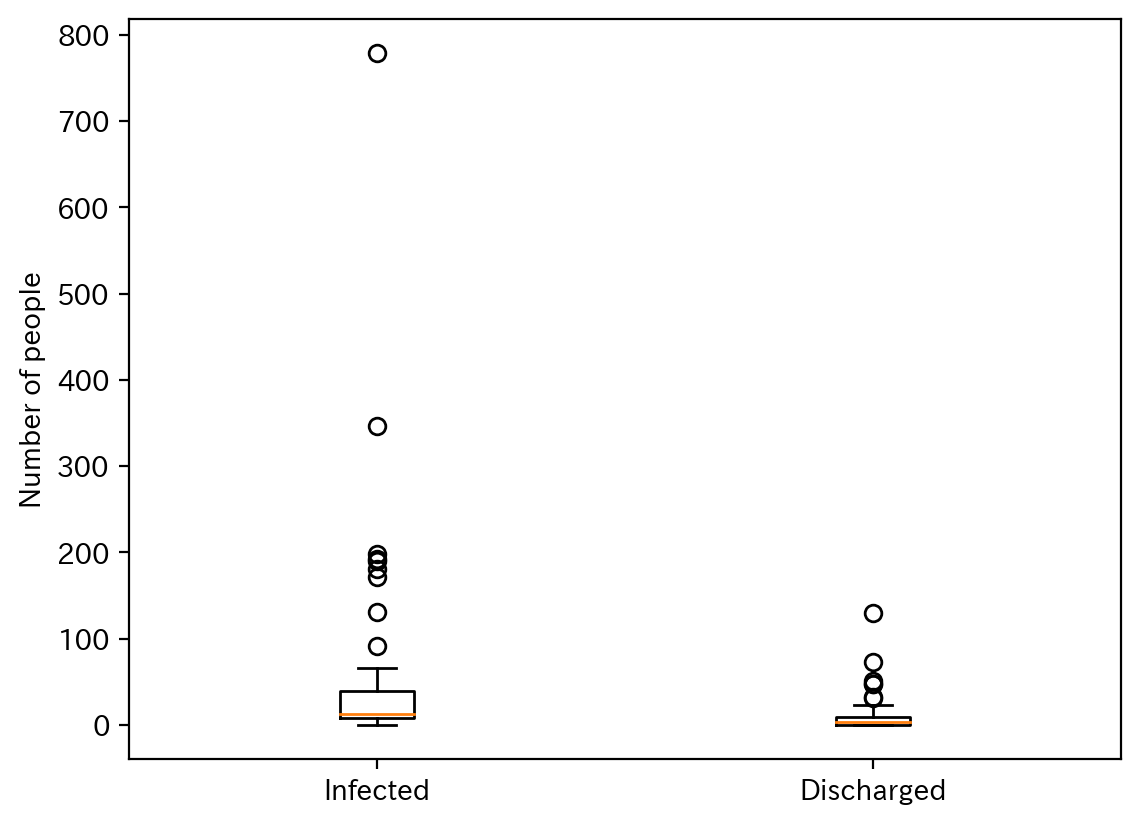

In [27]:
df_num = df.loc[:, 'Infected':'Discharged']
display(df_num.head())
plt.boxplot(df_num, labels=df_num.columns)
plt.ylabel('Number of people')
plt.show()

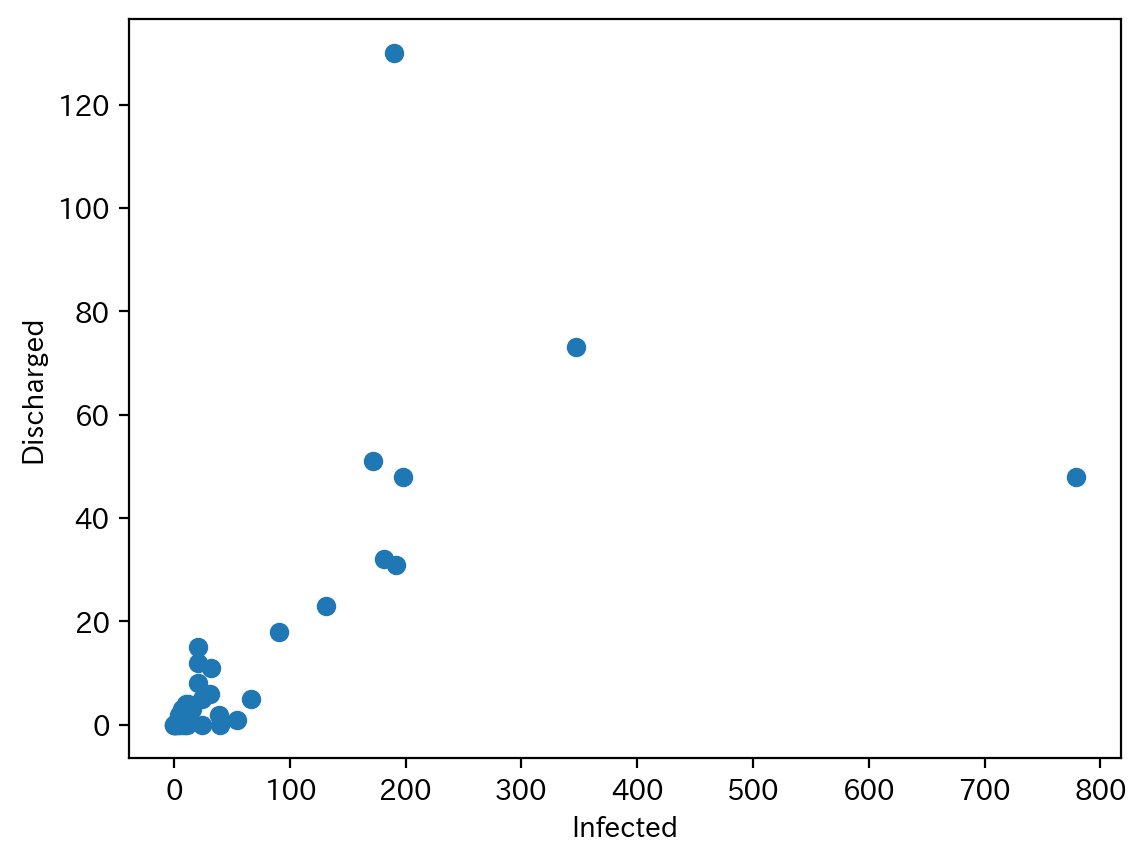

In [28]:
ser_1 = df['Infected']
ser_2 = df['Discharged']
plt.scatter(ser_1, ser_2, marker='o')
plt.xlabel('Infected')
plt.ylabel('Discharged')
plt.show()

C:\Users\iniad\AppData\Local\Temp\ipykernel_22356\1105214507.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_area = df.groupby('Area').sum()


Pop(100k)  Infected  Discharged    PCR
Area                                            
Chubu         205.5       359          73   8441
Chugoku        73.7        24           4   2690
Hokkaido       53.2       190         130   2803
Kanto         440.7      1384         140  20122
Kinki         224.2       678         172  13730
Kyushu        143.5       140          20   7443
Shikoku        37.8        37          16   1543
Tohoku         88.4        43           4   2070

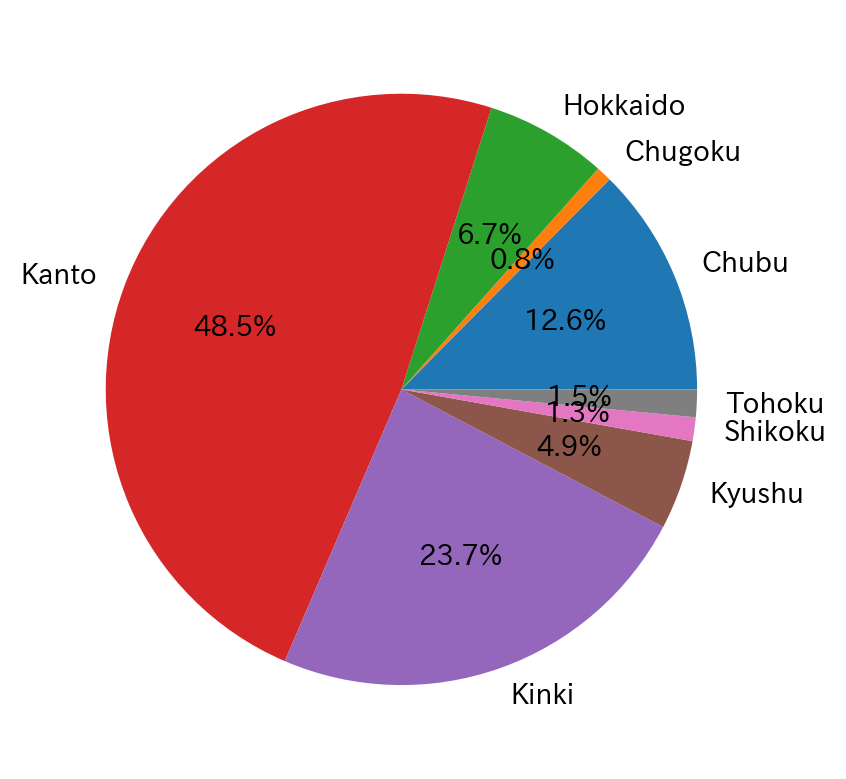

In [29]:
df_area = df.groupby('Area').sum()
display(df_area)
plt.pie(df_area['Infected'], autopct="%.1f%%", labels=df_area.index)
plt.show()

In [30]:
df['Infected_rate'] = df['Infected'] / df['Pop(100k)']

plt.bar(df_area['Infected_rate'].index, df_area['Infected_rate'], label='Average')
plt.ylabel('Infected per Pop(100k)')
plt.xticks(rotation=90)
plt.show()

KeyError: 'Infected_rate'

In [ ]:
csv_in2 = 'covid-19-japan-20200407.csv'
df_jpn = pd.read_csv(csv_in2)
print(df_jpn.shape)
print(df_jpn.info())
display(df_jpn.head())

In [ ]:
df_jpn['Date'] = pd.to_datetime(df_jpn['Date'])
print(df_jpn.dtypes)

In [ ]:
plt.bar(df_jpn['Date'], df_jpn['Infected_day'], label='Average')
plt.ylabel('Infected per day')
plt.xticks(rotation=90)
plt.show()

In [ ]:
ser_7d_ave = df_jpn['Infected_day'].rolling(window=7).mean()

plt.bar(df_jpn['Date'], ser_7d_ave, label='Average')
plt.ylabel('Infected per day(ave7)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
x =[0.12*i for i in range(1,61) ]
y = np.exp(x)
plt.plot(x, y, label='exp(0.12*x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()